In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')

In [119]:
!pip install xgboost

     |████                            | 20.3 MB 15 kB/s eta 2:37:3722^C

ERROR: Operation cancelled by user


In [115]:
disaster_df = pd.read_csv('train.csv')

In [51]:
disaster_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [52]:
disaster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [96]:
#Define the text from which you want to replace the url with "".
import re
def remove_links(text):
    text = re.sub(r'\d+', "", text)
    text = re.sub('http://\S+|https://\S+', '', text)
    emoji_pattern = re.compile("["
                        u"\U0001F600-\U0001F64F"  
                        u"\U0001F680-\U0001F6FF"  
                        u"\U0001F1E0-\U0001F1FF"  
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    text = re.sub(r'@\w+',  '', text).strip()
    text = re.sub("[^a-zA-Z0-9 ']", "", text)
    text=' '.join([wnl.lemmatize(i) for i in text.lower().split()])
    
    return text

In [97]:
disaster_df['text'] = disaster_df['text'].apply(remove_links)

In [98]:
disaster_df['text']

0       our deed are the reason of this earthquake may...
1                   forest fire near la ronge sask canada
2       all resident asked to 'shelter in place' are b...
3       people receive wildfire evacuation order in ca...
4       just got sent this photo from ruby alaska a sm...
                              ...                        
7608    two giant crane holding a bridge collapse into...
7609    the out of control wild fire in california eve...
7610                          m utckm s of volcano hawaii
7611    police investigating after an ebike collided w...
7612    the latest more home razed by northern califor...
Name: text, Length: 7613, dtype: object

In [9]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/dazedtiara6667/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
disaster_df['text'][10]

'Three people died from the heat wave so far'

In [12]:
word_tokenize(disaster_df['text'][0])

['Our',
 'Deeds',
 'are',
 'the',
 'Reason',
 'of',
 'this',
 '#',
 'earthquake',
 'May',
 'ALLAH',
 'Forgive',
 'us',
 'all']

In [13]:
from nltk.corpus import stopwords

In [14]:
stop_words = set(stopwords.words("english"))

In [76]:
from nltk.stem import WordNetLemmatizer

In [77]:
lemmatizer = WordNetLemmatizer()

In [80]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/dazedtiara6667/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [81]:
print(lemmatizer.lemmatize(disaster_df['text'][0]))

Our Deeds are the Reason of this earthquake May ALLAH Forgive us all


In [93]:
wnl=WordNetLemmatizer()

In [99]:
import string
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [16]:
disaster_df['text'] = disaster_df['text'].apply(text_process)

In [14]:
disaster_df['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
damage                   41
harm                     41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [116]:
disaster_df['text_length'] = disaster_df['text'].apply(len)

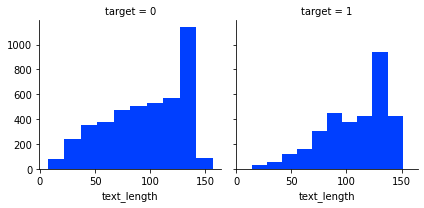

In [117]:
g = sns.FacetGrid(disaster_df,col='target')
g.map(plt.hist,'text_length')

In [24]:
disaster_df[['keyword','target']].corr()

,target
target,1.0


In [23]:
from sklearn.feature_extraction.text import CountVectorizer


In [25]:
from sklearn.feature_extraction.text import TfidfTransformer

In [18]:
from sklearn.model_selection import train_test_split

In [112]:
X_train,X_test,y_train,y_test = train_test_split(disaster_df['text'],disaster_df['target'],random_state=101,test_size=0.2)

In [27]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [32]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test, y_pred)

0.7841386554621849

In [68]:
test_df = pd.read_csv("test.csv")

In [103]:
X_tex = vectorizer.transform(test_df['text'])


In [129]:
df.to_csv('submission.csv')

In [134]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [114]:
tfidf = TfidfTransformer()
tfidf.fit(X_text)
X_tf = tfidf.transform(X_text)

In [115]:
X_tf

<7613x21637 sparse matrix of type '<class 'numpy.float64'>'
	with 111497 stored elements in Compressed Sparse Row format>

In [122]:
test_tf = tfidf.transform(X_tex)

In [142]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [144]:
y_pred = classifier.predict(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression

In [57]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),# strings to token integer counts  # integer counts to weighted TF-IDF scores
    ('classifier',MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [104]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f368ac9cd30>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [105]:
predictions = pipeline.predict(X_test)

In [107]:
accuracy_score(predictions,y_test)

0.8901878365952975

In [108]:
test_df['text'] = test_df['text'].apply(remove_links)

In [109]:
predict_test = pipeline.predict(test_df['text'])

In [110]:
submission = pd.DataFrame({'id':test_df['id'],'target':predict_test})

In [111]:
submission.to_csv("submissions.csv",index=False)

In [74]:
disaster_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64